In [1]:
import numpy as np
import pandas as pd
import statistics as cal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix

In [2]:
#loading in Dataset
#----------------------------------------------------------------------------------------------------------
df = pd.read_csv('matrix_Player_15_game_2_QuarterSplit.csv')

#dropping unnamed columns:
#------------------------------------------------------------------------------------------------------------
df.drop(columns =[ 'Unnamed: 0', 'Unnamed: 0.1'], inplace =True)

#plotting df
#-------------------------------------------------------------------------------------------------------------
df

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed,Filt_WheelX,Filt_FrameZ,Action,Action 180 rotation,Action 90 rotation,Action rotation,Quarter
0,17.912000,2828.7,3394.9,81.51500,0.232780,3581.0,7.3500,-8.93670,80.0330,-32.7370,-39.11400,45.0330,-11.80300,67.674366,8.849375,0.0,0,0,0,1
1,7.147600,2828.7,3395.7,81.39700,0.411900,3581.0,4.0600,-8.12000,80.0100,-1.0500,-15.96000,38.5700,83.61100,65.140780,8.214781,0.0,0,0,0,1
2,-0.890610,2828.8,3396.5,82.23300,0.483380,3581.0,-17.5700,-0.42000,81.3400,10.7800,-32.34000,45.6400,-789.07000,62.446959,7.721630,0.0,0,0,0,1
3,4.170500,2828.8,3397.3,74.34200,0.474470,3581.0,-1.6940,-10.50000,72.5760,16.4850,-41.60100,51.1630,-1.00990,59.592743,7.380241,0.0,0,0,0,1
4,1.157100,2828.8,3398.0,74.33200,0.516180,3581.0,-2.0922,-6.16000,73.1110,23.8470,-34.61900,54.2810,94.20100,56.579696,7.199759,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453006,-0.002098,6556.8,-1946.6,-0.18538,-0.000787,8604.1,1.0500,0.85556,-1.0500,1.4000,1.16670,-1.5867,-0.40135,1.489284,-0.866375,0.0,0,0,0,4
453007,-0.026347,6556.8,-1946.6,-0.18939,-0.000808,8604.1,1.0920,0.93100,-1.0710,1.4000,1.09200,-1.6240,-5.03910,1.494078,-0.864738,0.0,0,0,0,4
453008,0.012933,6556.8,-1946.6,-0.23979,-0.001071,8604.1,1.1690,0.95900,-1.1200,1.4000,1.08110,-1.5089,0.00000,1.498642,-0.863126,0.0,0,0,0,4
453009,0.000000,0.0,0.0,0.00000,0.000000,0.0,1.1433,0.93333,-1.0967,1.4000,1.08500,-1.4700,0.00000,1.502963,-0.861528,0.0,0,0,0,4


In [5]:
#setting the full turn dataframe this is 180 degrees
#-------------------------------------------------------------------------------------------------------------
full_turn = pd.DataFrame({'start': [3965.2,
                        4103,
                        4167,
                        4316.8,
                        5438.5,
                        6886,
                        7157,
                        7721],
             'stop': [3966.8,
                     4105.8,
                     4168.5,
                     4318,
                     5439.9,
                     6887,
                     7158,
                     7723]})


full_turn





# making df bigger
#-------------------------------------------------------------------------------------------------------------
df['frAcc2'] = df.frAcc*10   #influences the sprint
df['frRoAcc2'] = df.frRoAcc   #the rotational things is something to work on
df['frSpeed2'] = df.frSpeed*100     # influences the speed

df['frRoSpeed2'] = df.frRoSpeed*0.3

df['FRSX2'] = df.frameRotationalSpeedX*10      #influenced by fast offence or fast defence
df['FRSY2'] = df.frameRotationalSpeedY*10      #influenced by speed&Rot

df['WRSZ2'] = df.wheelRotationalSpeedZ*5      #variable for sprint
df['WRSY2'] = df.wheelRotationalSpeedY*3      #variable for rotations

df['WRSXDiff'] = np.insert(np.diff(df.wheelRotationalSpeedX,n=1)*12,0,0)
df['FRSZDiff'] = np.insert(np.diff(df.frameRotationalSpeedZ,n=1)*12,0,0) 
df


,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,...,frAcc2,frRoAcc2,frSpeed2,frRoSpeed2,FRSX2,FRSY2,WRSZ2,WRSY2,WRSXDiff,FRSZDiff
0,17.912000,2828.7,3394.9,81.51500,0.232780,3581.0,7.3500,-8.93670,80.0330,-32.7370,...,179.120000,2828.7,23.278000,-3.540900,73.500,-89.3670,225.1650,-117.34200,0.0000,0.0000
1,7.147600,2828.7,3395.7,81.39700,0.411900,3581.0,4.0600,-8.12000,80.0100,-1.0500,...,71.476000,2828.7,41.190000,25.083300,40.600,-81.2000,192.8500,-47.88000,380.2440,-0.2760
2,-0.890610,2828.8,3396.5,82.23300,0.483380,3581.0,-17.5700,-0.42000,81.3400,10.7800,...,-8.906100,2828.8,48.338000,-236.721000,-175.700,-4.2000,228.2000,-97.02000,141.9600,15.9600
3,4.170500,2828.8,3397.3,74.34200,0.474470,3581.0,-1.6940,-10.50000,72.5760,16.4850,...,41.705000,2828.8,47.447000,-0.302970,-16.940,-105.0000,255.8150,-124.80300,68.4600,-105.1680
4,1.157100,2828.8,3398.0,74.33200,0.516180,3581.0,-2.0922,-6.16000,73.1110,23.8470,...,11.571000,2828.8,51.618000,28.260300,-20.922,-61.6000,271.4050,-103.85700,88.3440,6.4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453006,-0.002098,6556.8,-1946.6,-0.18538,-0.000787,8604.1,1.0500,0.85556,-1.0500,1.4000,...,-0.020984,6556.8,-0.078682,-0.120405,10.500,8.5556,-7.9335,3.50010,0.6528,-1.3440
453007,-0.026347,6556.8,-1946.6,-0.18939,-0.000808,8604.1,1.0920,0.93100,-1.0710,1.4000,...,-0.263470,6556.8,-0.080780,-1.511730,10.920,9.3100,-8.1200,3.27600,0.0000,-0.2520
453008,0.012933,6556.8,-1946.6,-0.23979,-0.001071,8604.1,1.1690,0.95900,-1.1200,1.4000,...,0.129330,6556.8,-0.107130,0.000000,11.690,9.5900,-7.5445,3.24330,0.0000,-0.5880
453009,0.000000,0.0,0.0,0.00000,0.000000,0.0,1.1433,0.93333,-1.0967,1.4000,...,0.000000,0.0,0.000000,0.000000,11.433,9.3333,-7.3500,3.25500,0.0000,0.2796


In [18]:
#making variabes to detect the location of the 180 degree turns
#-------------------------------------------------------------------------------------------------------------
x=  pd.DataFrame(np.where(df['Action 90 rotation'] == 1))
x = pd.DataFrame.transpose(x)
print(x)


# creating one big 2D array so the extra variables will be stakked
#-------------------------------------------------------------------------------------------------------------
var = df.to_numpy()
print(var)




#creating for loop, that wil copy and paste the 180 degree turns on the bottom of the DF
#-------------------------------------------------------------------------------------------------------------
for i in x.values:
    y=df.iloc[i]
    y= y.to_numpy()
    #x = x.transpose()
    #print(y)
    var = np.vstack((var,y))
    #print(len(var))
    #df.append(y,ignore_index =True)
    #df.append(df.iloc[i],ignore_index=True)

#creating new headers for the df
#-------------------------------------------------------------------------------------------------------------
df = pd.DataFrame(var, columns=['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY',
                  'frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed','Filt_WheelX','Filt_FrameZ','Action',
                  'Action 180 rotation', 'Action 90 rotation','Action rotation','Quarter','frAcc2','frRoAcc2','frSpeed2','frRoSpeed2','FRSX2','FRSY2','WRSZ2','WRSY2','WRSXDiff','FRSZDiff'])
print(df)
  
    
    
    

            0
0       37787
1       37788
2       37789
3       37790
4       37791
...       ...
39691  487650
39692  487651
39693  487652
39694  487653
39695  487654

[39696 rows x 1 columns]
[[ 1.79120e+01  2.82870e+03  3.39490e+03 ... -1.17342e+02  0.00000e+00
   0.00000e+00]
 [ 7.14760e+00  2.82870e+03  3.39570e+03 ... -4.78800e+01  3.80244e+02
  -2.76000e-01]
 [-8.90610e-01  2.82880e+03  3.39650e+03 ... -9.70200e+01  1.41960e+02
   1.59600e+01]
 ...
 [-6.30280e-01  6.08730e+03 -5.09350e+02 ... -8.61000e+01  2.34000e+01
   1.00920e+02]
 [ 2.68860e+00  6.08730e+03 -5.11140e+02 ... -5.22900e+01 -3.27600e+01
   2.10000e+01]
 [-1.92170e+00  6.08730e+03 -5.12930e+02 ... -2.29320e+01  9.15600e+01
  -3.81600e+01]]
           frAcc  frRoAcc  frDispl  frRoAng  frSpeed  timeLine  \
0       17.91200   2828.7  3394.90   81.515  0.23278    3581.0   
1        7.14760   2828.7  3395.70   81.397  0.41190    3581.0   
2       -0.89061   2828.8  3396.50   82.233  0.48338    3581.0   
3        4.170

In [3]:
#trying to elete some of the values to create equal  1's and zero's (FAILED!!!!!!)
#-------------------------------------------------------------------------------------------------------------
#df.sort_values('Action 180 rotation',ascending=True)

#location = df[0:445996].sample(frac=0.50)


#print(location.index.values)
    
#for i in  location.index.values:
 #   if abs(df.frRoSpeed2[i]) > 500: 
  #         df.drop([i],inplace=True)
   # elif abs(df.frAcc2[i]) > 500:
    #       df.drop([i],inplace=True)
    #elif abs(df.FRSX2[i]) > 375:
#           df.drop([i],inplace=True)
#    elif abs(df.FRSY2[i]) > 300:
#           df.drop([i],inplace=True)
#    elif abs(df.WRSXDiff[i]) > 800:
#           df.drop([i],inplace=True)
           
    
    #df.drop([i])
    


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    447959
1.0     79392
Name: Action 180 rotation, dtype: int64

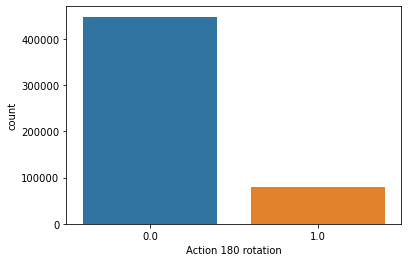

In [4]:
#location = df[0:445996].sample(frac=0.50)
#print(np.where(location['Action rotation']==1))
#for i in  location.index.values:
 #   #print(df['Action rotation'][i])
  #  if df['Action rotation'][i] != 1:
   #     df.drop([i],inplace=True)
    
df = pd.read_csv('player_15_balanced_rotations_Training&Testset.csv')

sns.countplot(df['Action 180 rotation'])
df['Action 180 rotation'].value_counts()

#df.sort_values('timeLine',ascending=True)
#df.to_csv('player_15_balanced_rotations_Training&Testset.csv')